In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("bank_churn_final.csv")

# Previewing the data
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
from sklearn.model_selection import train_test_split

X = df.drop("churn", axis=1)
y = df["churn"]

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


import seaborn as sns
import matplotlib.pyplot as plt

# Display shapes of splits
print(f"Training Set: {X_train.shape[0]} rows, {X_train.shape[1]} columns")
print(f"Testing Set:  {X_test.shape[0]} rows, {X_test.shape[1]} columns")

# Visualize churn distribution in both sets
train_df = pd.DataFrame({'Set': 'Train', 'Churn': y_train})
test_df = pd.DataFrame({'Set': 'Test', 'Churn': y_test})
combined = pd.concat([train_df, test_df])

sns.countplot(data=combined, x='Churn', hue='Set')
plt.title("Churn Distribution in Train vs Test Set")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [39]:
# Feature Scaling

# Import the scaler
from sklearn.preprocessing import StandardScaler

# Select only the continuous numeric columns to scale
scale_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit scaler only on training data to avoid data leakage
X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test_scaled[scale_cols] = scaler.transform(X_test[scale_cols])

# Check results
print("Before Scaling:")
print(X_train[scale_cols].head())

print("\nAfter Scaling:")
print(X_train_scaled[scale_cols].head())

Before Scaling:
      credit_score  age  tenure    balance  estimated_salary
2695           540   39       4  127278.31          16150.34
1274           700   44       2   58781.76          16874.92
8574           557   36       3       0.00         144078.02
1719           703   36       2       0.00         108790.95
7794           584   47       5       0.00          89286.29

After Scaling:
      credit_score       age    tenure   balance  estimated_salary
2695     -1.145934  0.137771 -0.346278  0.819446         -1.469514
1274      0.512268  0.705439 -1.037041 -0.280946         -1.456902
8574     -0.969750 -0.202830 -0.691659 -1.225271          0.757271
1719      0.543360 -0.202830 -1.037041 -1.225271          0.143043
7794     -0.689929  1.046040 -0.000897 -1.225271         -0.196466


In [40]:
# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=['country', 'gender'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['country', 'gender'], drop_first=True)

# Align test set to train columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [41]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
scaler = StandardScaler()

X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

X_train_scaled[scale_cols] = scaler.fit_transform(X_train_encoded[scale_cols])
X_test_scaled[scale_cols] = scaler.transform(X_test_encoded[scale_cols])


✅ Accuracy: 0.8265835929387332

✅ Confusion Matrix:
 [[1476   60]
 [ 274  116]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1536
           1       0.66      0.30      0.41       390

    accuracy                           0.83      1926
   macro avg       0.75      0.63      0.65      1926
weighted avg       0.81      0.83      0.80      1926



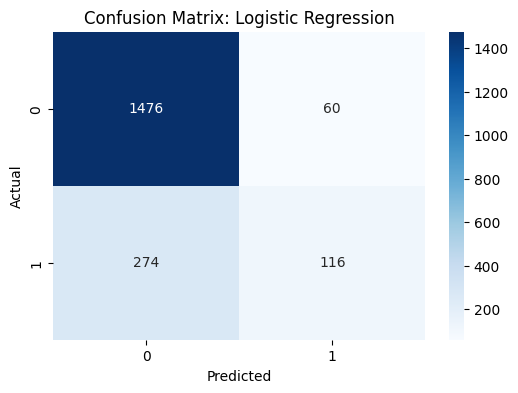

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# Visualize
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:31:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Accuracy: 0.8566978193146417

✅ Confusion Matrix:
 [[1448   88]
 [ 188  202]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1536
           1       0.70      0.52      0.59       390

    accuracy                           0.86      1926
   macro avg       0.79      0.73      0.75      1926
weighted avg       0.85      0.86      0.85      1926



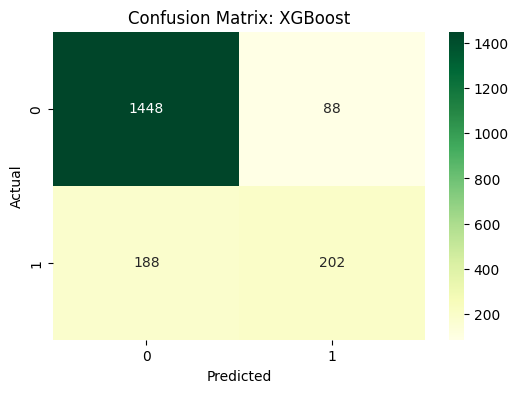

In [43]:
# 1️⃣ Install xgboost (run once in Colab)
!pip install xgboost

# 2️⃣ Import libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 3️⃣ Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_encoded, y_train)

# 4️⃣ Predict
y_pred_xgb = xgb_model.predict(X_test_encoded)

# 5️⃣ Evaluate
print("✅ XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_xgb))

# 6️⃣ Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='YlGn')
plt.title("Confusion Matrix: XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

✅ Random Forest Accuracy: 0.8691588785046729

✅ Confusion Matrix:
 [[1480   56]
 [ 196  194]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1536
           1       0.78      0.50      0.61       390

    accuracy                           0.87      1926
   macro avg       0.83      0.73      0.76      1926
weighted avg       0.86      0.87      0.86      1926



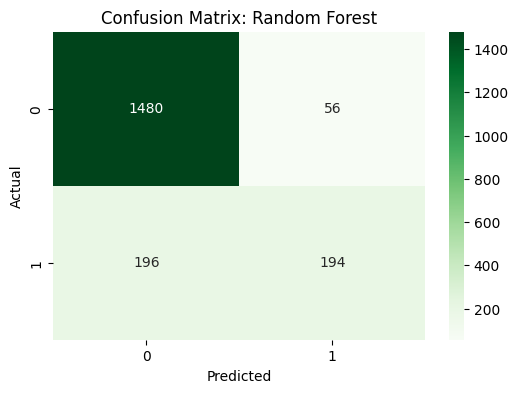

In [44]:
# 1️⃣ Import the model and evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 2️⃣ Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_encoded, y_train)

# 3️⃣ Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_encoded)

# 4️⃣ Evaluate the model
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred_rf))

# 5️⃣ Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-45-1156705681.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette='viridis')


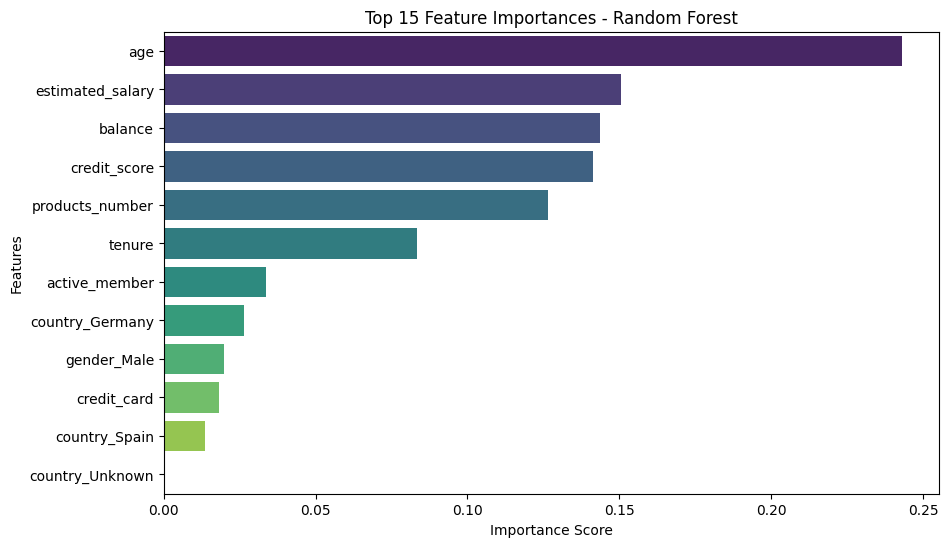

In [45]:
# Feature importance visualization (This shows which features had the biggest impact on predictions.)
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
features = X_train_encoded.columns
indices = np.argsort(importances)[::-1]

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette='viridis')
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


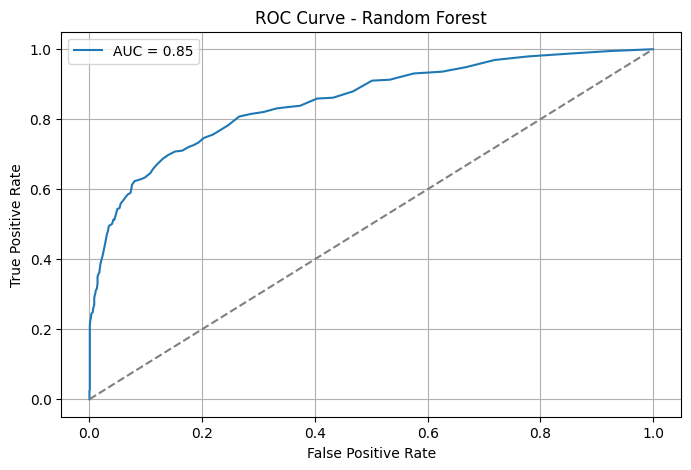

In [46]:
# ROC Curve & AUC Score (How well the model separates churners) This helps evaluate performance especially on imbalanced data.

from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for ROC
y_probs = rf_model.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Hyperparameter Tuning using GridSearchCV (This will find the best combination of parameters to improve accuracy.)

from sklearn.model_selection import GridSearchCV

# Define grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Run the grid search
grid_search.fit(X_train_encoded, y_train)

# Print best parameters and score
print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Accuracy on CV:", grid_search.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
✅ Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
✅ Best Accuracy on CV: 0.8614465653811193


In [48]:
# Model comparison

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

model_results = {}

# Logistic Regression
model_results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

# Random Forest
model_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}

# XGBoost
model_results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb)
}

# Convert to DataFrame
results_df = pd.DataFrame(model_results).T

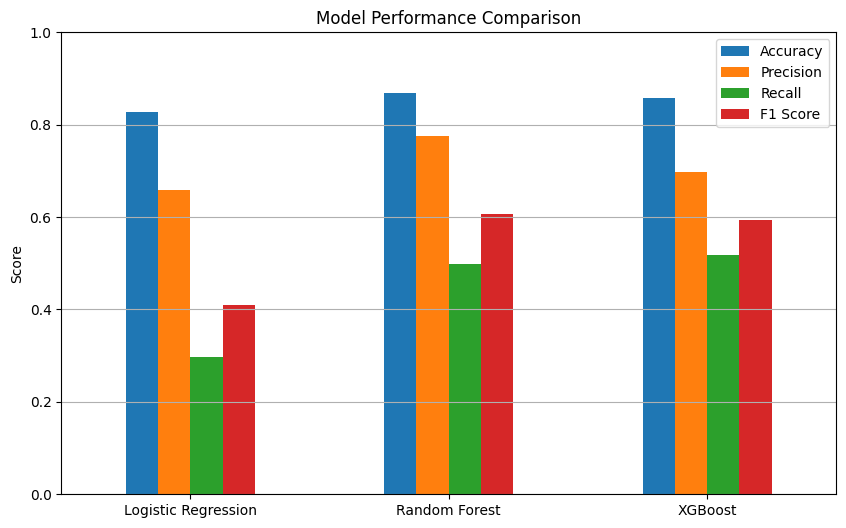

In [49]:
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [51]:
# recreating best_rf again for feature importance cell

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the base model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

# GridSearch with 5-fold CV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Train on the encoded training set
grid_search.fit(X_train_encoded, y_train)

# Get best model
best_rf = grid_search.best_estimator_


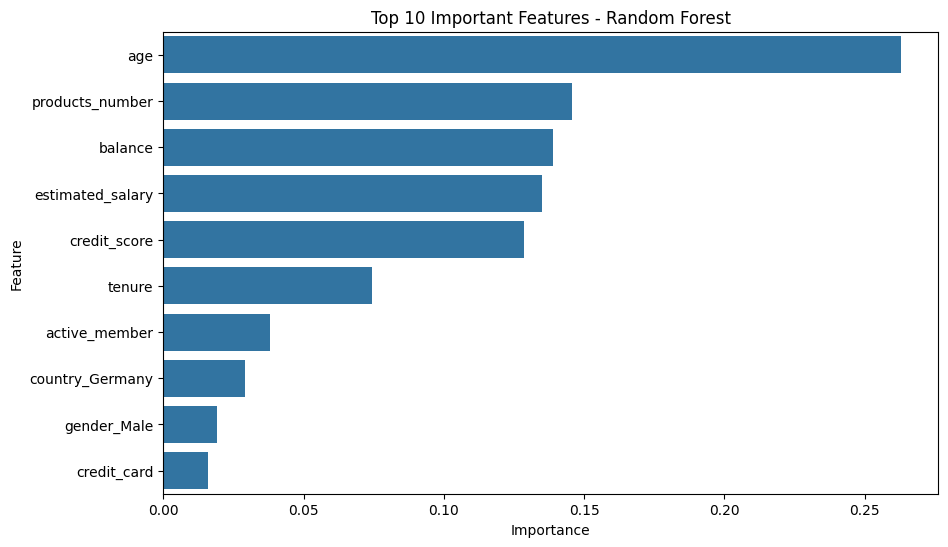

In [52]:
# Feature Importance ( To Understand which features most influence churn. )

# Feature importance
importances = best_rf.feature_importances_
features = X_train_encoded.columns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title("Top 10 Important Features - Random Forest")
plt.show()


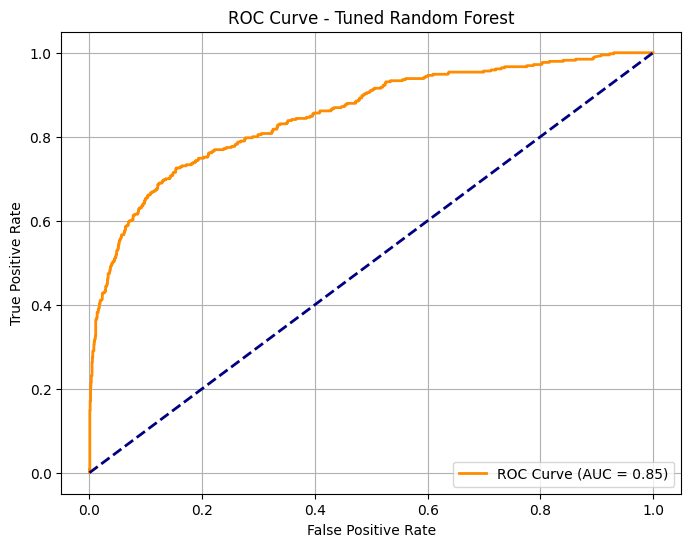

In [54]:
# Final ROC/AUC curve

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get predicted probabilities for class 1 (churn)
y_probs = best_rf.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [56]:
# Saving the model.

import joblib

# Save the trained Random Forest model
joblib.dump(best_rf, "random_forest_churn_model.pkl")   # ⬅️ Saves the model

# Save the scaler used during feature scaling
joblib.dump(scaler, "scaler.pkl")                       # ⬅️ Saves the StandardScaler

# Save the list of feature column names after encoding
joblib.dump(X_train_encoded.columns, "model_features.pkl")  # ⬅️ Saves the column order


['model_features.pkl']

In [57]:
# Downloading the model.

from google.colab import files
files.download("random_forest_churn_model.pkl")
files.download("scaler.pkl")
files.download("model_features.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>